IMPORT & CẤU HÌNH HIỂN THỊ

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Hiển thị đầy đủ DataFrame
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

# Hiển thị biểu đồ ngay trong notebook
%matplotlib inline
sns.set(style="whitegrid")


ĐỌC DỮ LIỆU & ĐỊNH NGHĨA NHÃN

In [ ]:
df = pd.read_csv("ParisHousing.csv")

VAR_LABELS = {
    "squareMeters": "Diện tích sử dụng (m²)",
    "numberOfRooms": "Số phòng",
    "floors": "Số tầng",
    "cityPartRange": "Mức độ khu vực (1–10)",
    "numPrevOwners": "Số chủ trước",
    "made": "Năm xây",
    "basement": "Diện tích tầng hầm",
    "attic": "Diện tích gác mái",
    "garage": "Diện tích gara",
    "hasGuestRoom": "Số phòng khách",
    "price": "Giá nhà (Euro)"
}

BINARY_LABELS = {
    "hasYard": "Có sân",
    "hasPool": "Có hồ bơi",
    "isNewBuilt": "Nhà mới",
    "hasStormProtector": "Chống bão",
    "hasStorageRoom": "Có kho"
}

quantitative_vars = list(VAR_LABELS.keys()) 
binary_vars = list(BINARY_LABELS.keys()) 


BƯỚC 2: THỐNG KÊ MÔ TẢ

In [17]:
# Biến định lượng
desc_quant = df[quantitative_vars].describe().rename(columns=VAR_LABELS)
desc_quant


,Diện tích sử dụng (m²),Số phòng,Số tầng,Mức độ khu vực (1–10),Số chủ trước,Năm xây,Diện tích tầng hầm,Diện tích gác mái,Diện tích gara,Số phòng khách,Giá nhà (Euro)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,49870.13120,50.358400,50.276300,5.510100,5.521700,2005.48850,5033.103900,5028.01060,5052.822400,49.898600,4.993448e+06
std,28774.37535,28.816696,28.889171,2.872024,2.856667,9.30809,2876.729545,2894.33221,2874.877786,29.031283,2.877424e+06
min,89.00000,1.000000,1.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,0.000000,0.000000,1.031350e+04
25%,25098.50000,25.000000,25.000000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,2593.500000,25.000000,2.516402e+06
50%,50105.50000,50.000000,50.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,5075.500000,50.000000,5.016180e+06
75%,74609.75000,75.000000,76.000000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,7531.500000,75.000000,7.469092e+06
max,99999.00000,100.000000,100.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,9999.000000,100.000000,1.000677e+07


In [18]:
# Biến nhị phân
bin_summary = []

for var, label in BINARY_LABELS.items():
    n = df[var].count()
    count_1 = df[var].sum()
    bin_summary.append({
        "Biến": label,
        "Số quan sát": n,
        "Số có (1)": count_1,
        "Tỷ lệ (%)": round(count_1 / n * 100, 2)
    })

pd.DataFrame(bin_summary)


,Biến,Số quan sát,Số có (1),Tỷ lệ (%)
0,Có sân,10000,5087,50.87
1,Có hồ bơi,10000,4968,49.68
2,Nhà mới,10000,4991,49.91
3,Chống bão,10000,4999,49.99
4,Có kho,10000,5030,50.30


BƯỚC 3: TRỰC QUAN HÓA DỮ LIỆU

Phân phối giá nhà

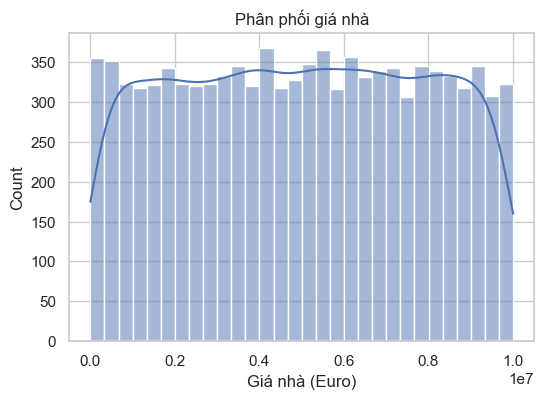

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df["price"], bins=30, kde=True)
plt.xlabel(VAR_LABELS["price"])
plt.title("Phân phối giá nhà")
plt.show()


Giá nhà theo diện tích

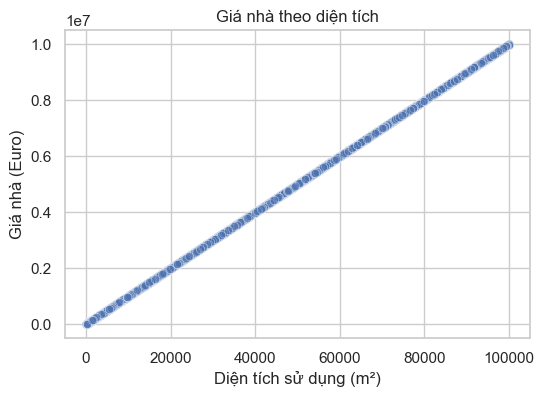

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["squareMeters"], y=df["price"], alpha=0.5)
plt.xlabel(VAR_LABELS["squareMeters"])
plt.ylabel(VAR_LABELS["price"])
plt.title("Giá nhà theo diện tích")
plt.show()


Giá nhà theo số tầng

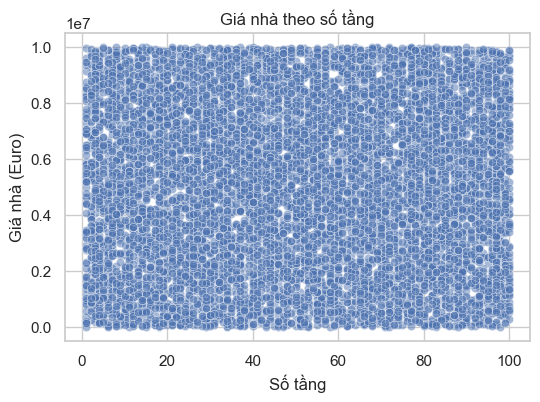

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["floors"], y=df["price"], alpha=0.5)
plt.xlabel(VAR_LABELS["floors"])
plt.ylabel(VAR_LABELS["price"])
plt.title("Giá nhà theo số tầng")
plt.show()


Boxplot theo khu vực

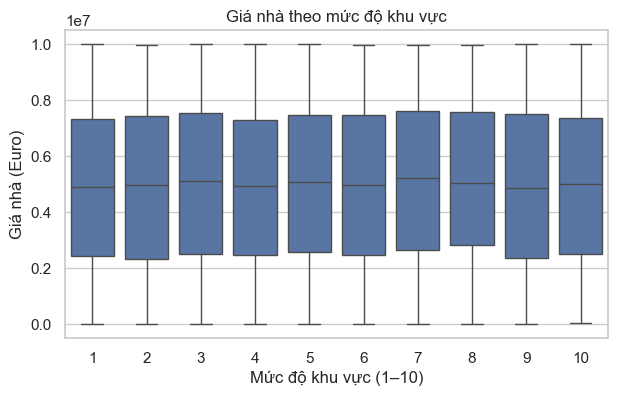

In [22]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["cityPartRange"], y=df["price"])
plt.xlabel(VAR_LABELS["cityPartRange"])
plt.ylabel(VAR_LABELS["price"])
plt.title("Giá nhà theo mức độ khu vực")
plt.show()


BƯỚC 5 & 6: ƯỚC LƯỢNG MÔ HÌNH ĐẦY ĐỦ

In [23]:
X = df[
    [
        "squareMeters",
        "floors",
        "cityPartRange",
        "numberOfRooms",
        "numPrevOwners",
        "made",
        "basement",
        "attic",
        "garage",
        "hasGuestRoom"
    ]
]

y = df["price"]
X = sm.add_constant(X)

model_full = sm.OLS(y, X).fit()
model_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.014e+09
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:49:16   Log-Likelihood:                -93760.
No. Observations:               10000   AIC:                         1.875e+05
Df Residuals:                    9989   BIC:                         1.876e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6774.6945   6159.665      1.100      0.271   -5299.490    1.88e+04
squareMeters     99.9993      0.001   1.01e+05      0.000      99.997     100.001
floors           54.3112      0.989     54.893      0.000      52.372      56.251
cityPartRange    57.6188      9.951      5.790      0.000      38.112      77.126
numberOfRooms     0.5688      0.992      0.573      0.566      -1.376       2.514
numPrevOwners    -1.7765     10.006     -0.178      0.859     -21.390      17.837
made             -1.6803      3.071     -0.547      0.584      -7.700       4.339
basement         -0.0108      0.010     -1.084      0.278      -0.030       0.009
attic            -0.0116      0.010     -1.179      0.239      -0.031       0.008
garage            0.0083      0.010      0.833      0.405      -0.011       0.028
hasGuestRoom      1.3311      0.984      1.352      0.176      -0.599       3.261
==============================================================================
Omnibus:                      150.618   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.198
Skew:                           0.245   Prob(JB):                     9.79e-31
Kurtosis:                       2.696   Cond. No.                     1.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

REGRESSION STATISTICS & ANOVA

In [24]:
pd.DataFrame({
    "Statistic": ["Multiple R", "R Square", "Adjusted R²", "Std Error", "Observations"],
    "Value": [
        np.sqrt(model_full.rsquared),
        model_full.rsquared,
        model_full.rsquared_adj,
        np.sqrt(model_full.scale),
        int(model_full.nobs)
    ]
})


,Statistic,Value
0,Multiple R,1.000000
1,R Square,0.999999
2,Adjusted R²,0.999999
3,Std Error,2857.250041
4,Observations,10000.000000


In [25]:
pd.DataFrame({
    "Source": ["Regression", "Residual", "Total"],
    "df": [
        model_full.df_model,
        model_full.df_resid,
        model_full.df_model + model_full.df_resid
    ],
    "Sum of Squares": [
        model_full.ess,
        model_full.ssr,
        model_full.centered_tss
    ],
    "F": [model_full.fvalue, "", ""],
    "Prob > F": [model_full.f_pvalue, "", ""]
})


,Source,df,Sum of Squares,F,Prob > F
0,Regression,10.0,8.278733e+16,1014068755.496205,0.0
1,Residual,9989.0,8.154898e+10,,
2,Total,9999.0,8.278742e+16,,


BƯỚC 7: BACKWARD ELIMINATION

In [26]:
def backward_elimination(X, y, alpha=0.05):
    X_curr = X.copy()
    while True:
        model = sm.OLS(y, X_curr).fit()
        pvals = model.pvalues.drop("const")
        if pvals.max() > alpha:
            drop_var = pvals.idxmax()
            print(f"Loại biến: {VAR_LABELS.get(drop_var, drop_var)} (p = {pvals.max():.4f})")
            X_curr = X_curr.drop(columns=[drop_var])
        else:
            break
    return sm.OLS(y, X_curr).fit()

final_model = backward_elimination(X, y)
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.381e+09
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:49:17   Log-Likelihood:                -93763.
No. Observations:               10000   AIC:                         1.875e+05
Df Residuals:                    9996   BIC:                         1.876e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3419.2914     93.382     36.616      0.000    3236.244    3602.338
squareMeters     99.9994      0.001   1.01e+05      0.000      99.997     100.001
floors           54.3058      0.989     54.907      0.000      52.367      56.244
cityPartRange    57.4977      9.949      5.779      0.000      37.996      77.000
==============================================================================
Omnibus:                      150.767   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.773
Skew:                           0.246   Prob(JB):                     7.34e-31
Kurtosis:                       2.698   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

BƯỚC 8: CHẨN ĐOÁN PHẦN DƯ

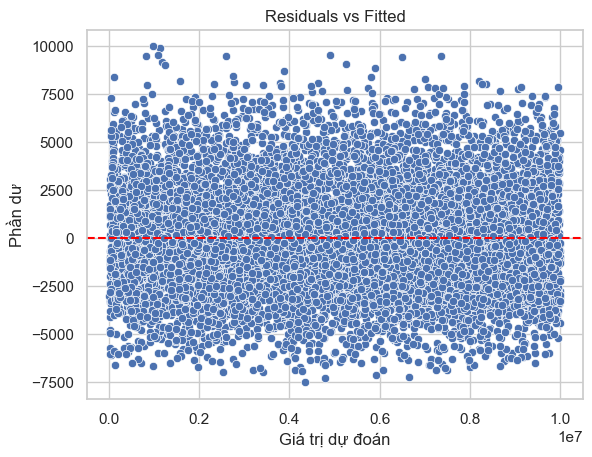

In [27]:
resid = final_model.resid
fitted = final_model.fittedvalues

plt.figure()
sns.scatterplot(x=fitted, y=resid)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Phần dư")
plt.title("Residuals vs Fitted")
plt.show()


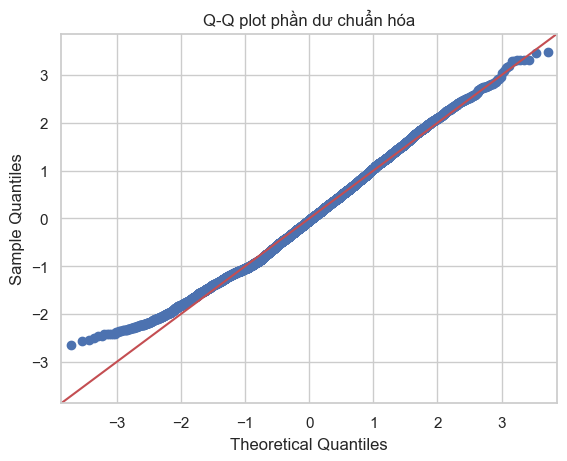

In [28]:
std_resid = final_model.get_influence().resid_studentized_internal
sm.qqplot(std_resid, line="45")
plt.title("Q-Q plot phần dư chuẩn hóa")
plt.show()


BƯỚC 9: DỰ ĐOÁN

In [29]:
df["predicted_price"] = final_model.predict(final_model.model.exog)
df[["price", "predicted_price"]].head()


,price,predicted_price
0,7559081.5,7.559265e+06
1,8085989.5,8.086249e+06
2,5574642.1,5.575960e+06
3,3232561.2,3.235899e+06
4,7055052.0,7.051334e+06


BƯỚC 10: KẾT LUẬN

In [30]:
print("Mô hình cuối cùng gồm các biến:")
for v in final_model.model.exog_names:
    print("-", "Hằng số" if v=="const" else VAR_LABELS.get(v, v))
